# 0.) Import and Clean data

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [130]:
import warnings
warnings.filterwarnings('ignore')

In [131]:
df = pd.read_csv("bank-additional-full .csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [132]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)

In [133]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,149,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,37,226,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,40,151,no,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,56,307,no,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [134]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

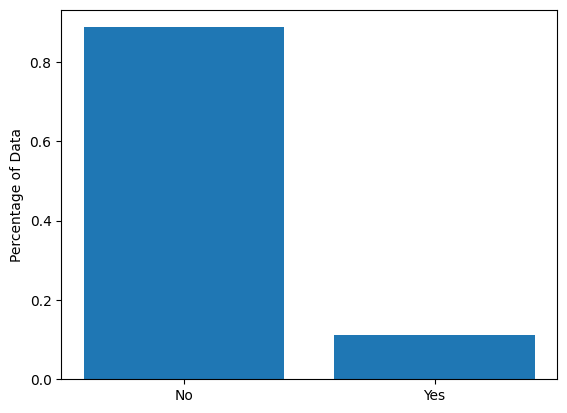

In [135]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [136]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [137]:
X_scaled

array([[-1.05370899e+00, -6.95116435e-01, -1.59354604e-01, ...,
        -3.80604293e-01,  1.54270966e+00, -2.11638189e-01],
       [-1.05370899e+00, -9.44916212e-01, -1.59354604e-01, ...,
        -3.80604293e-01,  1.54270966e+00, -2.11638189e-01],
       [ 4.77399239e-01,  7.34982641e-02, -1.59354604e-01, ...,
        -3.80604293e-01, -6.48210109e-01, -2.11638189e-01],
       ...,
       [-4.79543407e-01, -2.45476836e-01, -1.59354604e-01, ...,
        -3.80604293e-01, -6.48210109e-01, -2.11638189e-01],
       [-1.07208378e-03,  1.42673587e-01, -1.59354604e-01, ...,
        -3.80604293e-01,  1.54270966e+00, -2.11638189e-01],
       [-1.05370899e+00,  2.88710380e-01, -1.59354604e-01, ...,
        -3.80604293e-01,  1.54270966e+00, -2.11638189e-01]])

### 1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [138]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_scaled, y_train)

In [139]:
smote_X

array([[-1.05370899, -0.69511644, -0.1593546 , ..., -0.38060429,
         1.54270966, -0.21163819],
       [-1.05370899, -0.94491621, -0.1593546 , ..., -0.38060429,
         1.54270966, -0.21163819],
       [ 0.47739924,  0.07349826, -0.1593546 , ..., -0.38060429,
        -0.64821011, -0.21163819],
       ...,
       [-0.84079644,  1.56879631, -0.1593546 , ...,  2.62740074,
        -0.64821011, -0.21163819],
       [ 1.69440657,  0.06033983, -0.1593546 , ..., -0.38060429,
        -0.54511351, -0.21163819],
       [ 0.85339773,  0.32163541, -0.1593546 , ..., -0.38060429,
         1.54270966, -0.21163819]])

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [140]:
dtree_main = DecisionTreeClassifier(max_depth = 3)
dtree_main.fit(smote_X, smote_y)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.172\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.457\ngini = 0.294\nsamples = 19785\nvalue = [16242, 3543]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.132\nsamples = 11592\nvalue = [10769, 823]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.111\nsamples = 11331\nvalue = [10663, 668]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.482\nsamples = 261\nvalue = [106, 155]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.319\ngini = 0.444\nsamples = 8193\nvalue = [5473, 2720]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.493\nsamples = 6020\nvalue = [3375, 2645]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.067\nsamples = 2173\nvalue = [2098, 75]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.322\ngini = 0.418\nsamples = 31375\nvalue = [9338, 22037]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.673\ngini = 0.339\nsamples = 25714\nvalue = [5553, 20161]\ncla

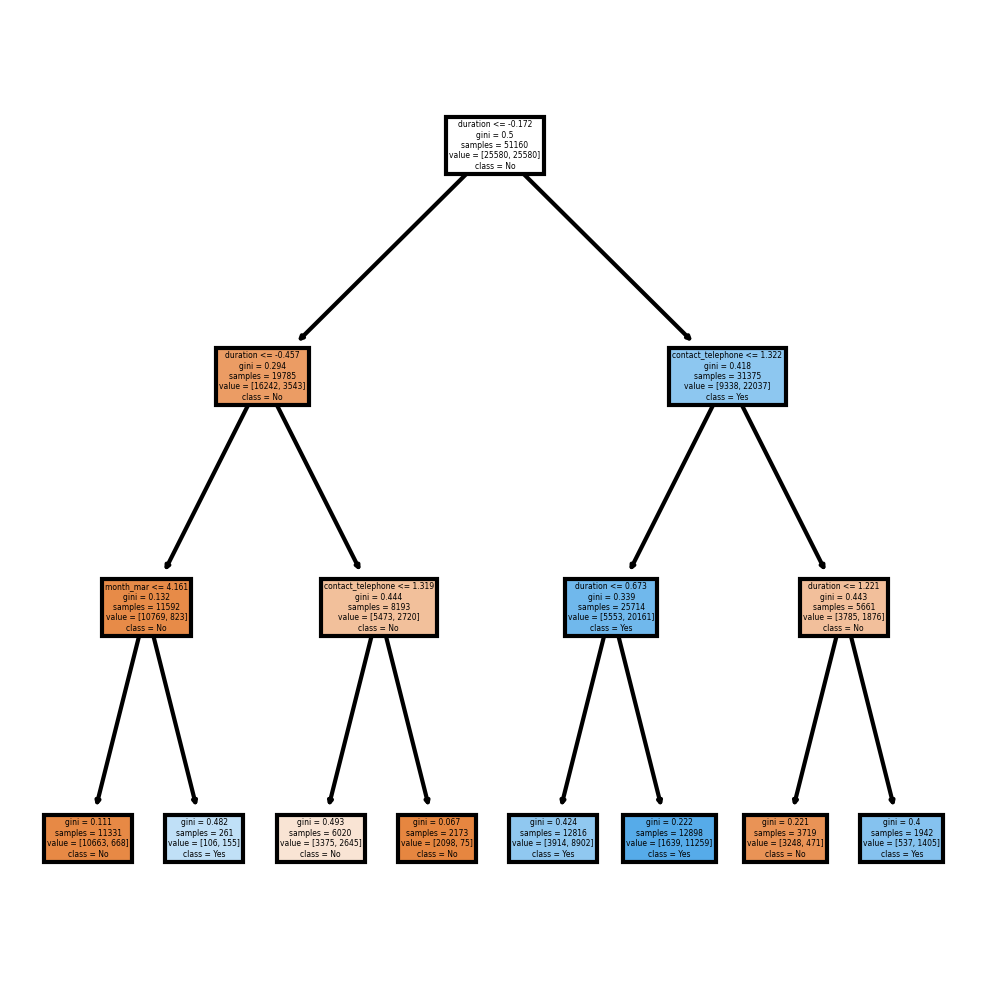

In [141]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree_main, filled = True, feature_names = X.columns, class_names=["No","Yes"])


#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [142]:
y_pred = dtree_main.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_pred, y_true)

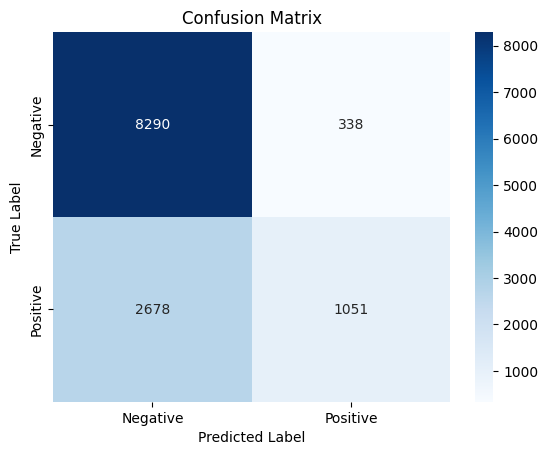

In [143]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

In [144]:
dtree = DecisionTreeClassifier(max_depth = 3)

In [145]:
bagging = BaggingClassifier(estimator = dtree,
                 n_estimators = 100,
                 max_samples = .5,
                 max_features = 1.)

In [146]:
bagging.fit(smote_X, smote_y)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                  max_samples=0.5, n_estimators=100)

In [147]:
y_pred = bagging.predict(X_test)

In [148]:
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

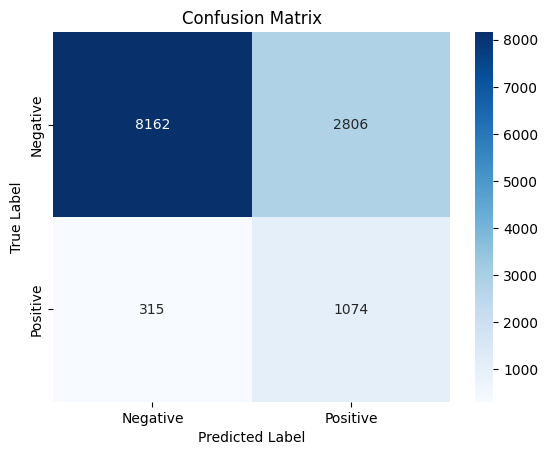

In [149]:
class_labels = ['Negative', 'Positive']
# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
#we can see marginal improvement 

# 4.) Boost your tree

In [150]:
from sklearn.ensemble import AdaBoostClassifier

In [151]:
dtree = DecisionTreeClassifier(max_depth = 3)

In [152]:
boost = BaggingClassifier(estimator = dtree,
                          n_estimators = 100)
#learning_rate = .1

In [153]:
boost.fit(smote_X, smote_y)
y_pred = boost.predict(X_test) 

In [154]:
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

# 5.) Train a Logistic Regression (Super Learner) on Boosted Tree, Bagged Tree

In [155]:
from sklearn.linear_model import LogisticRegression

In [156]:
base_predictions = [list(dtree_main.predict (smote_X)), 
list(boost.predict(X_train)),
list(bagging.predict(X_train))]

In [157]:
n=len(base_predictions[0])

In [158]:
base_predictions = np.array(base_predictions).transpose()

In [159]:
super_learner = LogisticRegression()

In [160]:
base_predictions = [
    list(dtree_main.predict(smote_X)),  
    list(boost.predict(smote_X)),       
    list(bagging.predict(smote_X))     
]
base_predictions = np.array(base_predictions).transpose()

In [161]:
super_learner = LogisticRegression()
super_learner.fit(base_predictions, smote_y)

LogisticRegression()

In [162]:
print(len(smote_y))
print(base_predictions.shape[0])

51160
51160


In [163]:
super_learner.coef_

array([[1.15425845, 0.6865808 , 1.14971046]])

dtree coefficient is 1.15 suggesting that  it has a large influence on the super learner's prediction. 0.68 is the coefficient for the boosting model, and it has a lower magnitute compared to decision tree, while still being positive, so it also influences super learner's prediction just in the smaller way. bagging coefficient 1.14 is similar to dtree, having the same result on the final output. 